In [7]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
load_dotenv()

True

In [8]:
model=ChatOpenAI()


In [10]:

class Cricket(TypedDict):
    
    run : int
    balls : int
    
    fours : int
    sixes : int
    
    sr:float
    bpd:float
    boundary_percentage:float

In [26]:
def calculate_sr(state:Cricket)->Cricket:
    sr=(state['run']/state['balls'])*100
    
    return {'sr':sr}
    

def calculate_bpd(state:Cricket)->Cricket:
    bpd=state['balls']/ (state['run']/6)
    return {'bpd':bpd}

def calculate_boundary_percentage(state:Cricket)->Cricket:
    total_boundaries=state['fours'] + state['sixes']
    boundary_percentage=(total_boundaries*100)/state['run']
    return {'boundary_percentage':boundary_percentage}

def summary(state:Cricket)->Cricket:
    prompt=f"""The batsman has scored {state['run']} runs 
    from {state['balls']} balls with a strike rate of {state['sr']:.2f}.
    He hits a boundary percentage of {state['boundary_percentage']:.2f}% 
    and scores {state['bpd']:.2f} runs per boundary."""
    
    response=model.invoke(prompt)
    print("Summary:",response)
    return {"summary":response}

In [27]:
graph=StateGraph(Cricket)

graph.add_node("calculate_sr",calculate_sr)
graph.add_node("calculate_bpd",calculate_bpd)
graph.add_node("calculate_boundary_percentage",calculate_boundary_percentage)
graph.add_node("summay",summary)

# edges
graph.add_edge(START,"calculate_sr")
graph.add_edge(START,"calculate_bpd")
graph.add_edge(START,"calculate_boundary_percentage")


graph.add_edge("calculate_sr","summay")
graph.add_edge("calculate_bpd","summay")
graph.add_edge("calculate_boundary_percentage","summay")

graph.add_edge("summay",END)



In [28]:
workflow=graph.compile()

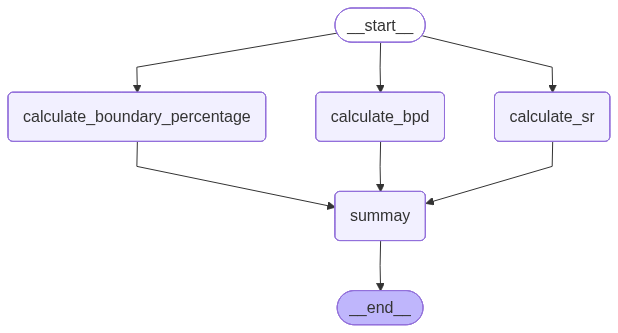

In [29]:
workflow

In [30]:
initial_State={"run": 100, "balls": 50, "fours": 6, "sixes": 4}

In [31]:
final_state=workflow.invoke(initial_State)

Summary: content='To calculate the number of boundaries the batsman hit, we first need to find out how many runs he scored from boundaries. \n\nBoundary runs = Total runs * Boundary percentage\nBoundary runs = 100 runs * 10%\nBoundary runs = 100 runs * 0.10\nBoundary runs = 10 runs\n\nNext, we can calculate the number of boundaries the batsman hit.\n\nNumber of boundaries = Boundary runs / Runs per boundary\nNumber of boundaries = 10 runs / 3 runs per boundary\nNumber of boundaries = 3.33 ~ 3 boundaries\n\nTherefore, the batsman hit 3 boundaries during his innings.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 129, 'prompt_tokens': 55, 'total_tokens': 184, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprin

In [32]:
print(final_state)

{'run': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'sr': 200.0, 'bpd': 3.0, 'boundary_percentage': 10.0}
